## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. The number of unique users in the dataset.

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [6]:
df['converted'].value_counts()/df['converted'].shape[0]

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df[((df['group']=='treatment')==(df['landing_page']=='new_page'))==False].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2=df[((df['group']=='treatment')==(df['landing_page']=='new_page'))==True]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.loc[1899]

user_id                             773192
timestamp       2017-01-09 05:37:58.781806
group                            treatment
landing_page                      new_page
converted                                0
Name: 1899, dtype: object

In [15]:
df2['user_id'].duplicated().sum()

1

In [16]:
df2.drop_duplicates(['user_id'], inplace=True)

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df2['user_id'].duplicated().sum()

0

In [18]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.shape[0]

290584

In [20]:
df2['converted'].value_counts()

0    255831
1     34753
Name: converted, dtype: int64

In [21]:
converted=df2.query('converted==True')

In [22]:
p_converted=converted.shape[0]/df2.shape[0]
p_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
control=df2.query('group=="control"')

In [24]:
converted_control=converted.query('group=="control"')
converted_control.head()

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
28,913579,2017-01-24 09:11:39.164256,control,old_page,1
36,831737,2017-01-11 21:18:20.911015,control,old_page,1
43,862225,2017-01-08 14:49:37.335432,control,old_page,1


In [25]:
converted_control.shape[0]/control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
treatment=df2.query('group=="treatment"')

In [27]:
converted_treatment=converted.query('group=="treatment"')
converted_treatment.head()

,user_id,timestamp,group,landing_page,converted
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
17,888545,2017-01-08 06:37:26.332945,treatment,new_page,1
26,892356,2017-01-05 09:35:14.904865,treatment,new_page,1


In [28]:
converted_treatment.shape[0]/treatment.shape[0]

0.11880806551510564

In [29]:
#compute the diffrences between probability of converted given that an individual was in the control
#group and in the treatment group, and put it to 'obs_diff'

obs_diff=converted_control.shape[0]/control.shape[0]-converted_treatment.shape[0]/treatment.shape[0]
obs_diff

0.0015782389853555567

d. What is the probability that an individual received the new page?

In [30]:
df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

> I do not think that there is sufficient evidence to conclude that the new treatment page leads to more conversions bacause the difference of the probabilities are similer.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$H_0 :  p_{new} - p_{old} =< 0$$ 

$$H_1 : p_{new} - p_{old} > 0$$

In [31]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [32]:
# Under the null, p_new(p_new_n) should be the same as the proportion of conversion
p_new_n=p_converted
p_new_n

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [33]:
#Under the null, p_old(p_old_p) should be the same as the proportion of conversion
p_old_n=p_converted
p_old_n

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [34]:
n_new=df2.query('group=="treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [35]:
n_old=df2.query('group=="control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [36]:
new_page_converted=np.random.binomial(1, p_new_n, n_new)
new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
p_new=np.sum(new_page_converted==1)/len(new_page_converted)
p_new

0.1186016103502856

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [38]:
old_page_converted=np.random.binomial(1, p_old_n, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
p_old=np.sum(old_page_converted==1)/len(old_page_converted)
p_old

0.11752275011357848

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [40]:
p_new-p_old


0.001078860236707127

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [41]:
p_diffs=[]
for _ in range(10000):    
    new_page_converted=np.random.binomial(1, p_new_n, n_new)
    old_page_converted=np.random.binomial(1, p_old_n, n_old)
    pnew=np.sum(new_page_converted==1)/len(new_page_converted)
    pold=np.sum(old_page_converted==1)/len(old_page_converted)
    p_diffs.append(pnew-pold)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

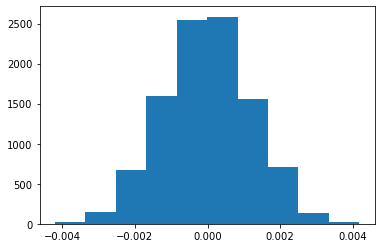

In [42]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
diffs=np.array(p_diffs)
null_vals=np.random.normal(0, diffs.std(), diffs.size)

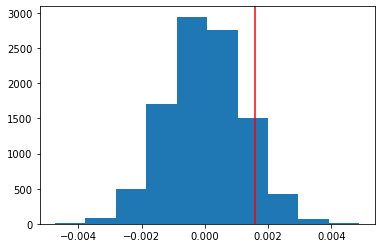

In [44]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [45]:
(null_vals<obs_diff).mean()

0.9035

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

>Here, I computed sample stasistic nuder the H0 by 10000 times simulation where mean of difference between new and old page is zero. PLot created based on the statistics that looks normal distribution as expected.

>Then create null_vals, normal distribution with mean being zero and std being std of statistics computed abave.

>Then computed p-value, that is the probability of observed value('obs_diff') calculated above c occurred under H0 hypothesis.  

>The p-value is larger than 0.05. That means that probability of observed event happens in the H0 hypothesis, null_vals distribution, is statistically probable, therefore I can not reject H0 hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [46]:
import statsmodels.api as sm

convert_old = converted_control.shape[0]
convert_new = converted_treatment.shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [47]:
z_score, p_val=sm.stats.proportions_ztest([convert_new, convert_old], 
                                          [n_new, n_old], alternative='larger')
z_score, p_val

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

>J results and K results agree that H0 can not be rejected, though both results are not exactly identical.

>The z_score is a regularized sd(distance from mean) under normal distribution of H0, and p-vale is a probability(area) of z-score. Under the hypothesis that conversion rates of the old and new pages are equal, z_score shows the distance from the mean of the normal distribution of the hypothesis and p_value shows the probability of z_score.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

>I will use Logistic Regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [49]:
#create new colums for 'intercept', 'treatment' and 'control'
df2['intercept']=1
df2[['treatment', 'control']]=pd.get_dummies(df['group'])
df2.head(1)

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wythe\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,treatment,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0


In [50]:
#rename the colums, 'treatment' to 'ab_page' as instructed in the above c
df2.rename(columns={'control':'ab_page'}, inplace=True)
df2.head(1)

C:\Users\wythe\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,timestamp,group,landing_page,converted,intercept,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [51]:
logit_mod=sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-10-13 23:43 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**Put your answer here.**

> The p-value associated with ab_page is 0.1899. This p_value shows how statistically significant of coefficient of ab_page to the convertion under this regression anaysis（Null hypothesis：coefficient = 0). The p-value, 0.1899 is larger than 0.05 that means coef. of ab_page does not have statistical meaning.

>On the other hand, the p-value in Part II is a  confidence level of Null hypothesis. 

>Those values are based on different hypothesis, therefore, it is not appropriate to compared them. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

>Both p-value and R-squared are not statistically significant, therefore it needs to considet other factors to add into regression model.

>It worth noting that additonal terms into the regiression model may cause side effects of multicoineality etc.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns -Provide the statistical output as well as a written response to answer this question.

In [53]:
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [54]:
df_countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [55]:
#created new df3 by merge df2 and df_countries together
df3=pd.merge(df_countries, df2, on='user_id')
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [56]:
#to created 3 new columns for three dummy valuables
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [57]:
#'CA' dropped as baseline
logit_mod=sm.Logit(df3['converted'], df3[['intercept','ab_page','UK','US']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [58]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-10-13 23:43 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

> P-values are all above 0.05. Coefficients for ab_page and also UK, US do not make statistically significant effects on conversion under this logistic regression analysis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
# create two additional columns which represent the interaction between page and
# and countries(US and UK)
df3['US_new'] = df3['US'] * df3['ab_page']
df3['UK_new'] = df3['UK'] * df3['ab_page']
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page,CA,UK,US,US_new,UK_new
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1


In [60]:
logit_mod=sm.Logit(df3['converted'], df3[['intercept','ab_page','UK_new','US_new']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [61]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212778.9383
Date:               2020-10-13 23:43 BIC:              212821.2568
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.067853   
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
UK_new        0.0901    0.0405     2.2252  0.0261   0.0107   0.1694
US_new        0.0644    0.0384     1.6788  0.0932  -0.0108   0.1396
==================================================================

"""

### Conclusions

> now, ab_page and UK_new

## Supplement Analysis

> As mentioned in the conclusion, the results of the regression analysis does not make sense. Therefore, I tryed to add one more factors that is the day of week.

> I assume that proportion of conversion may significantly differ depend on the day of week.

In [62]:
#convert dtypes of 'timestamp' to datetime64[ns]
df3['timestamp']=pd.to_datetime(df3['timestamp'],format='%Y-%m-%d')
df3.dtypes

user_id                  int64
country                 object
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
intercept                int64
treatment                uint8
ab_page                  uint8
CA                       uint8
UK                       uint8
US                       uint8
US_new                   uint8
UK_new                   uint8
dtype: object

In [63]:
#create two new columns, 'weekday_name' and 'weekday_num'
df3['weekday_name']=df3['timestamp'].dt.strftime('%a')
df3['weekday_num']=df3['timestamp'].dt.dayofweek
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page,CA,UK,US,US_new,UK_new,weekday_name,weekday_num
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,Sat,5
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0,Mon,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,Mon,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,Sun,6
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,Mon,0


In [64]:
#create new df, 'df_weekday' that includes dummy valuables of week day
dummy=pd.get_dummies(df3['weekday_name'])
df_weekday=df3.join(dummy)
df_weekday.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page,CA,...,UK_new,weekday_name,weekday_num,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,...,0,Sat,5,0,0,1,0,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,...,0,Mon,0,0,1,0,0,0,0,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,...,1,Mon,0,0,1,0,0,0,0,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,...,0,Sun,6,0,0,0,1,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,...,1,Mon,0,0,1,0,0,0,0,0


In [68]:
#Friday dropped as baseline
logit_mod=sm.Logit(df_weekday['converted'], df_weekday[['intercept','ab_page','UK_new','US_new','Sat','Sun','Mon'
                                                        ,'Tue','Wed','Thu']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366100
         Iterations 6


In [69]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212785.3935
Date:               2020-10-13 23:44 BIC:              212891.1900
No. Observations:   290584           Log-Likelihood:   -1.0638e+05
Df Model:           9                LL-Null:          -1.0639e+05
Df Residuals:       290574           LLR p-value:      0.17786    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0167    0.0167  -121.0504  0.0000  -2.0493  -1.9840
ab_page      -0.0827    0.0380    -2.1758  0.0296  -0.1571  -0.0082
UK_new        0.0902    0.0405     2.2288  0.0258   0.0109   0.1695
US_new        0.0644    0.0384     1.6789  0.0932  -0.0108   0.1396
Sat           0.0395    0.0220     1.7978  0.0722  -0.0036   0.0825
Sun           0.0171    0.0220     0.7759  0.4378  -0.0261   0.0602
Mon           0.0425    0.0212     2.0015  0.0453   0.0009   0.0842
Tue           0.0272    0.0211     1.2898  0.1971  -0.0142   0.0687
Wed           0.0349    0.0220     1.5866  0.1126  -0.0082   0.0780
Thu           0.0315    0.0221     1.4265  0.1537  -0.0118   0.0747
==================================================================

"""

### Conclusion of supplement analysis

> Only coefficient of Monday shows a statistical meaning to the conversion probablity. This result is not so much as assumed nor expected. There should be other more appropriate factors or analysis method but I can not go further any longer due to lack of my ability.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0